<a href="https://colab.research.google.com/github/rjc89/Data_science_portfolio/blob/master/time_series_classifiers_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install peakutils
!pip install fbprophet
!pip install altair

## Imports

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import peakutils
from scipy import signal
from scipy.signal import argrelextrema, butter, lfilter, filtfilt
import timeit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix, roc_auc_score, roc_curve, plot_roc_curve, plot_precision_recall_curve, precision_recall_fscore_support, classification_report

from fbprophet import Prophet
import altair as alt
import warnings

## Question 1 
There are two dice. A person rolls the first die. If the number is higher than
2, they roll the first die again. Otherwise, they roll a second die. If the
number on the second die is greater than 5, they score 1 point. If the
number on the second die is less than or equal to 5, they score 2 points.
What is the expectation value and variance if this game is played many
times?

## Answer Q1:




In [0]:
# EX = sum(P(x) * x)
# Var X = E[X**2] - E[X]**2

In [0]:
# Setup a probability table
prob_score_2 = (2/6) * (5/6)
prob_score_1 = (2/6) * (1/6)

score = [1 , 2]
probability = [prob_score_1, prob_score_2]
d = {'score': [1, 2], 'probability': [prob_score_1, prob_score_2]}
prob_df = pd.DataFrame(data = d)

In [0]:
# Calculating the components of EX and VX
prob_df['Px'] = prob_df.score * prob_df.probability
prob_df['Xsq'] = prob_df.score**2
prob_df['Px_Xsq'] = prob_df.Px * prob_df.Xsq
prob_df

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,score,probability,Px,Xsq,Px_Xsq
0,1,0.055556,0.055556,1,0.055556
1,2,0.277778,0.555556,4,2.222222


In [0]:
# Calculate the expected value EX
EX = sum(prob_df.Px)
EX

0.6111111111111112

In [0]:
# Calculate the variance VX
VX = sum(prob_df.Px_Xsq) - EX**2
VX

1.9043209876543208

In [0]:
# Calculating standard deviation
sd = np.sqrt(VX)
sd

1.37997137204158

## Question 2

A string, S, containing N brackets is correctly matched if any of these
criteria are met:

* len(S) == 0,
* S is “(A)” or “[A]” or “{A}”, where A is a correctly matched string,
* S is “AB”, where both A and B are correctly matched strings.
For example, “{}([[]])” and “()[]” are considered matched, whereas “(]()” and
“(({)})” are not.
Please write a function, “is_matched(S)”, that returns True if S is correctly
matched and False if not.
* You can assume that the string S contains only brackets and is
shorter than 200,000 characters.
* The time and space complexities of your answer should be O(n).




(Note: Please use Python if you are comfortable with it, although any other
programming language is acceptable if not.)

## Answer Q2:


In [0]:
def is_matched(S):
  l_brac = ['(', '{', '[']
  r_brac = [')', '}', ']']
  brac_dic = {'(':')', '{':'}', '[':']'}
  brac_list = [['(', ')'], ['{', '}'], ['[', ']']]
  #S = list(S)

  if len(S) == 0:
    return True
  
  if S[0] not in l_brac or S[-1] not in r_brac:
    return False

  if len(S) % 2 != 0:
    return False
  
  if S.count('(') != S.count(')') or S.count('[') != S.count(']') or S.count('{') != S.count('}'):
    return False

  while len(S) > 2:
  
    for i,x in enumerate(S):

      if x in l_brac and S[i+1] == brac_dic.get(x):
        S = S[:i] + S[i+2:]
        print(i, S, len(S))
        #except IndexError as "False"
  else:
    return True

In [0]:
#S = '[])({}'
S = [10*'{' + 10*'}', 100*'{' + 100*'}', 1000*'{' + 1000*'}', 10000*'{' + 10000*'}', 100000*'{' + 100000*'}']
print(S)

is_matched(S[0])

['{{{{{{{{{{}}}}}}}}}}', '{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}', '{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{

True

In [0]:
%%capture
result1 = %timeit -o is_matched(S[0])
result2 = %timeit -o is_matched(S[1])
result3 = %timeit -o is_matched(S[2])
result4 = %timeit -o is_matched(S[3])
# result5 = %timeit -o is_matched(S[4])

best1 = result1.best
best2 = result2.best
best3 = result3.best
best4 = result4.best
# best5 = result5.best

Text(0, 0.5, 'Time')

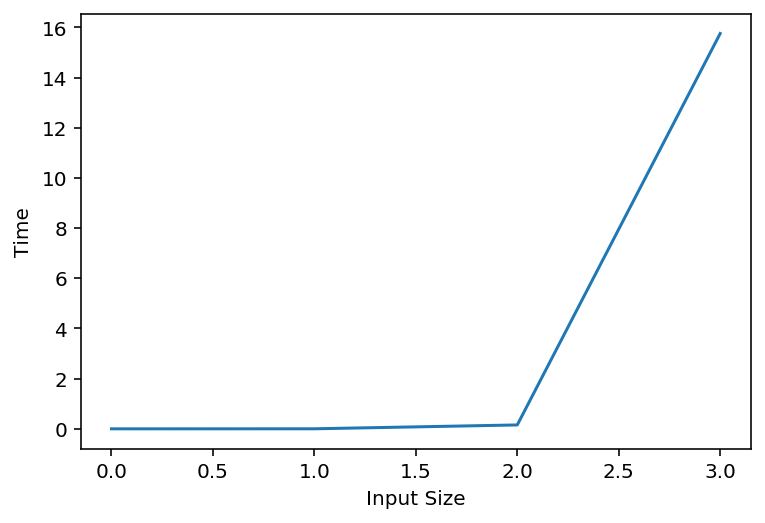

In [0]:
best_list = [best1, best2, best3, best4]
plt.plot(best_list)
plt.xlabel('Input Size')
plt.ylabel('Time')

- Based on the time complexity chart above...it does not appear that I have achieved O(n) linear complexity for this function


## Question 3

You are given data of total (aggregated) power consumption, and the TV
power consumption of three households. Each household has data for one
day.

* Task 1: Using TV instantaneous power consumption data, identify the
times when the TV is “ON”. Notice that some TVs may have standby
modes.
* Task 2: Using all the data given, design a classifier to identify times when
the TV is “ON”. You may also want to train and test your designed
classifier. The trained classifier should not take TV instantaneous power as
input.


Please provide a script which attempts task 1 and 2. Please do not
provide a script without explanations.


Additional information:
Data format in the attached .csv file: “House” column indicates which
house it is, ranging from 1 to 3. “Time” column indicates time stamps.
“TV” column indicates TV instantaneous power consumption. “Agg”
column indicates total (aggregated) instantaneous power consumption.
Sampling rate is 1/60 Hz.

## Answer Q3:

In [0]:
import pandas as pd
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Q3-data.csv")

In [0]:
data.head()

,House,Time,TV,Agg
0,1.0,0.0,11.463,26.205
1,1.0,1.0,11.702,25.771
2,1.0,2.0,11.016,24.963
3,1.0,3.0,11.054,96.582
4,1.0,4.0,11.123,100.034


In [0]:
data.describe()

,House,Time,TV,Agg
count,4320.000000,4320.000000,4320.000000,4320.000000
mean,2.000000,719.500000,32.845289,166.344412
std,0.816591,415.740214,43.186524,429.634987
min,1.000000,0.000000,0.125000,1.870000
25%,1.000000,359.750000,1.464000,25.064500
50%,2.000000,719.500000,11.254000,94.642000
75%,3.000000,1079.250000,63.783500,129.584750
max,3.000000,1439.000000,136.806000,2981.841000


In [0]:
data['House'].value_counts()

3.0    1440
2.0    1440
1.0    1440
Name: House, dtype: int64

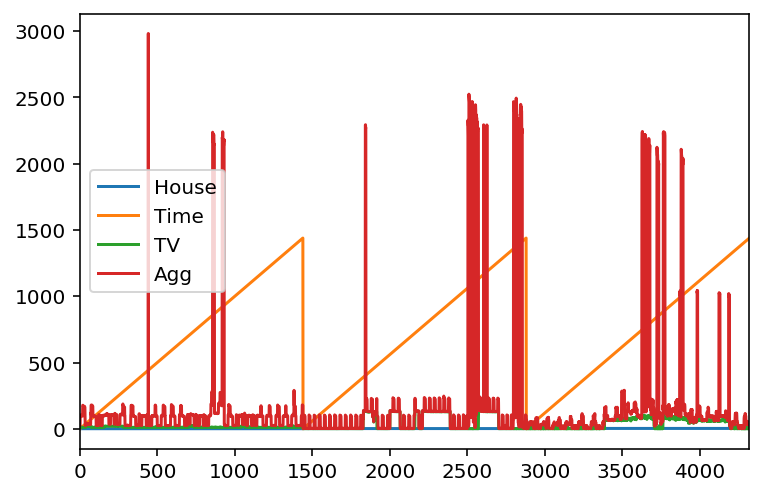

In [0]:
data.plot()

In [0]:
data_house = data.groupby(data['House'])

House
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

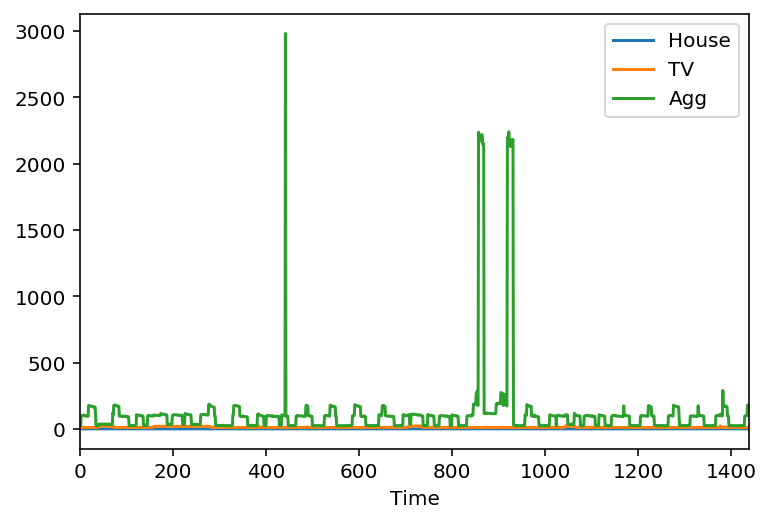

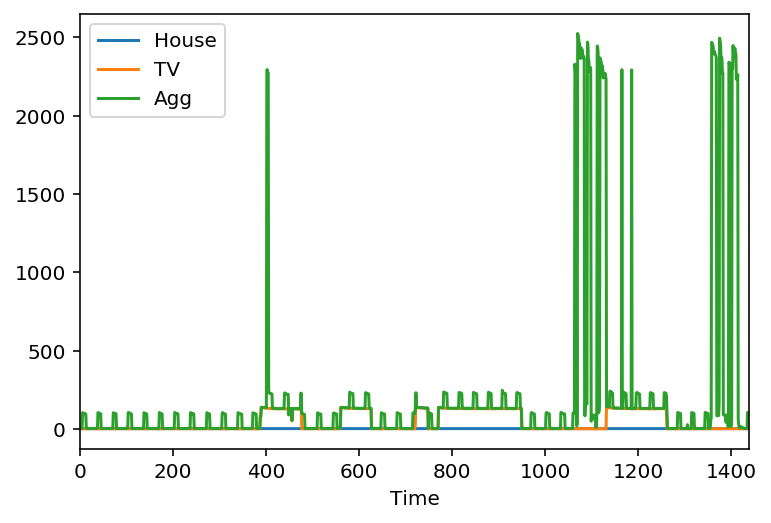

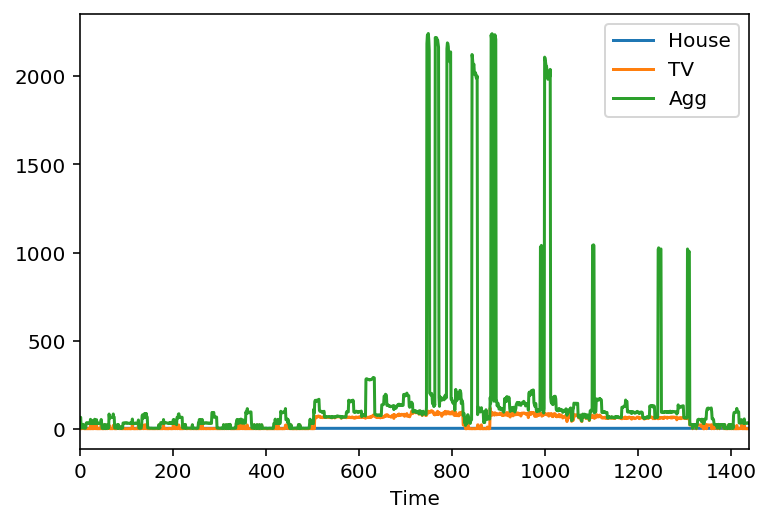

In [0]:
data_house.plot(x = 'Time')

House
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

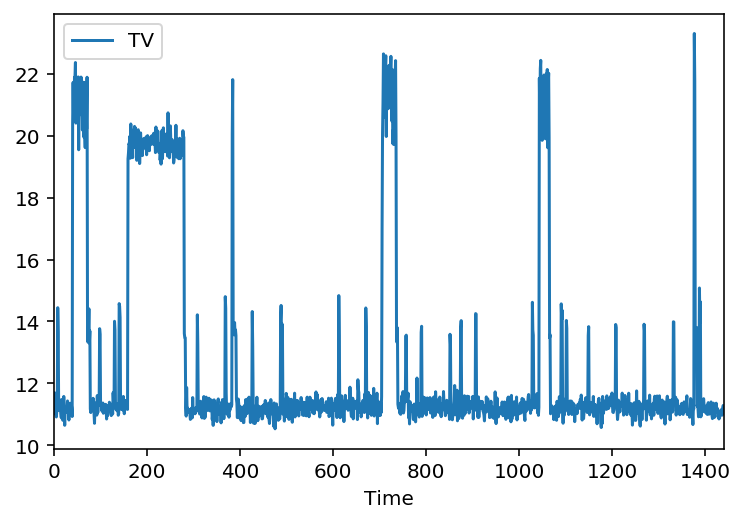

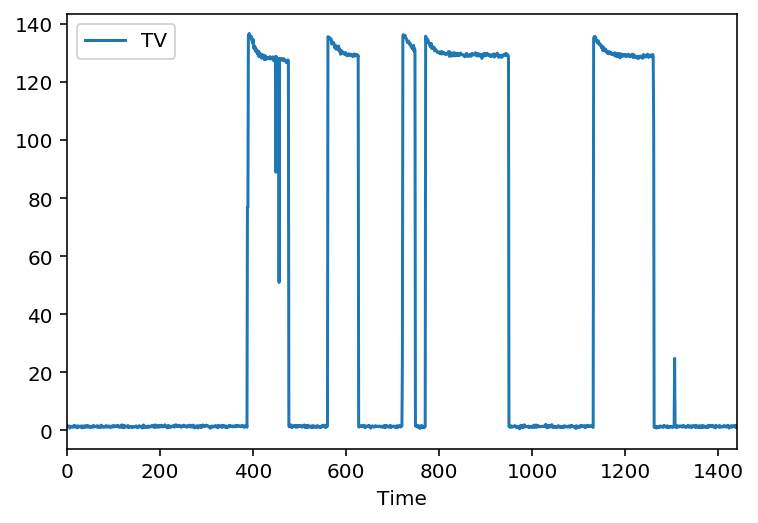

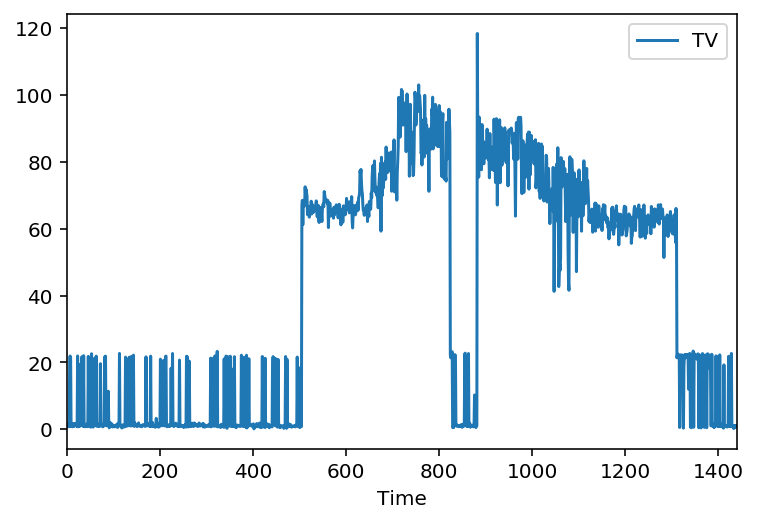

In [0]:
data_house.plot(x = 'Time', y = 'TV')

In [0]:
house1 = data.loc[data['House'] == 1]
house2 = data.loc[data['House'] == 2]
house3 = data.loc[data['House'] == 3]

##### Signal Smoothing/Filtering



In [0]:
# Lowpass filter with a rolling mean, of window 5 samples, will shift the indexes of peaks over by 5
house1_rolling = house1.rolling(window = 5, min_periods=1).mean()

In [0]:
#Butterworth low pass with filtfilt method, will prevent this peak index shiftbut prevent "online" use
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [0]:
butter_lowpass(0.1, fs = 60, order = 5)
house1TV_butter = butter_lowpass_filter(house1.TV, 0.999, fs = 60, order = 1)

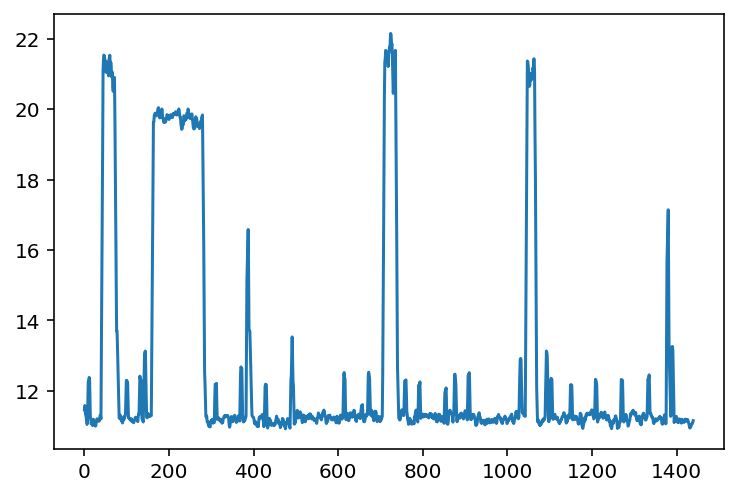

In [0]:
# Compare rolling mean smoothing
plt.plot(house1_rolling.TV)

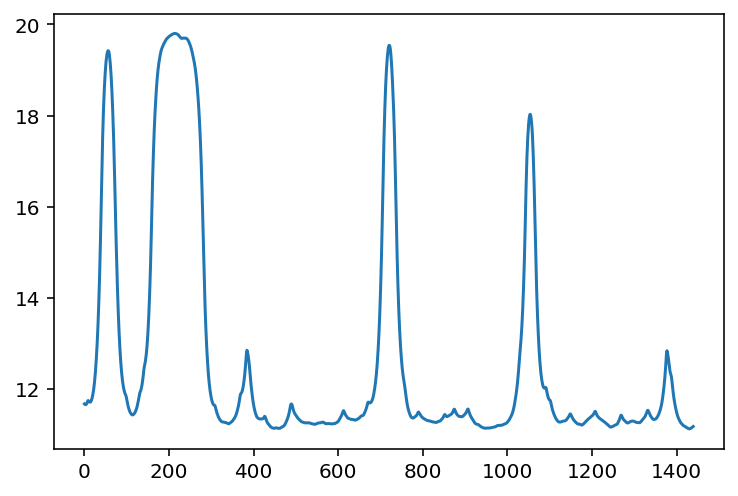

In [0]:
# ..to the butteworth low pass filtfilt, which looks over smoothed (even at cutoff 0.999 and order = 1)
plt.plot(house1TV_butter)

In [0]:
# smooth the data for the other houses with a rolling mean for consistency
house2_rolling = house2.rolling(window = 5, min_periods=1).mean()
house3_rolling = house3.rolling(window = 5, min_periods=1).mean()

##### Peak finding




In [0]:
# using the rolling mean smoothed data
cb = np.array(house1_rolling['TV'])
peaks = peakutils.indexes(cb, thres=0.7, min_dist=5)
# troughs = peakutils.indexes(-cb, thres=0.02/max(cb), min_dist=10)
peaks

array([  46,   52,   60,   71,  167,  175,  183,  189,  195,  204,  210,
        216,  223,  235,  245,  254,  263,  270,  279,  712,  724,  735,
       1047, 1054, 1063])

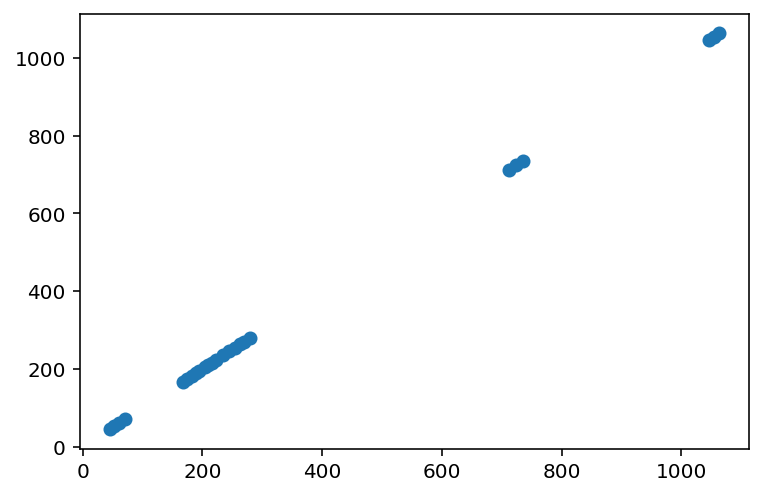

In [0]:
plt.scatter(peaks, peaks)

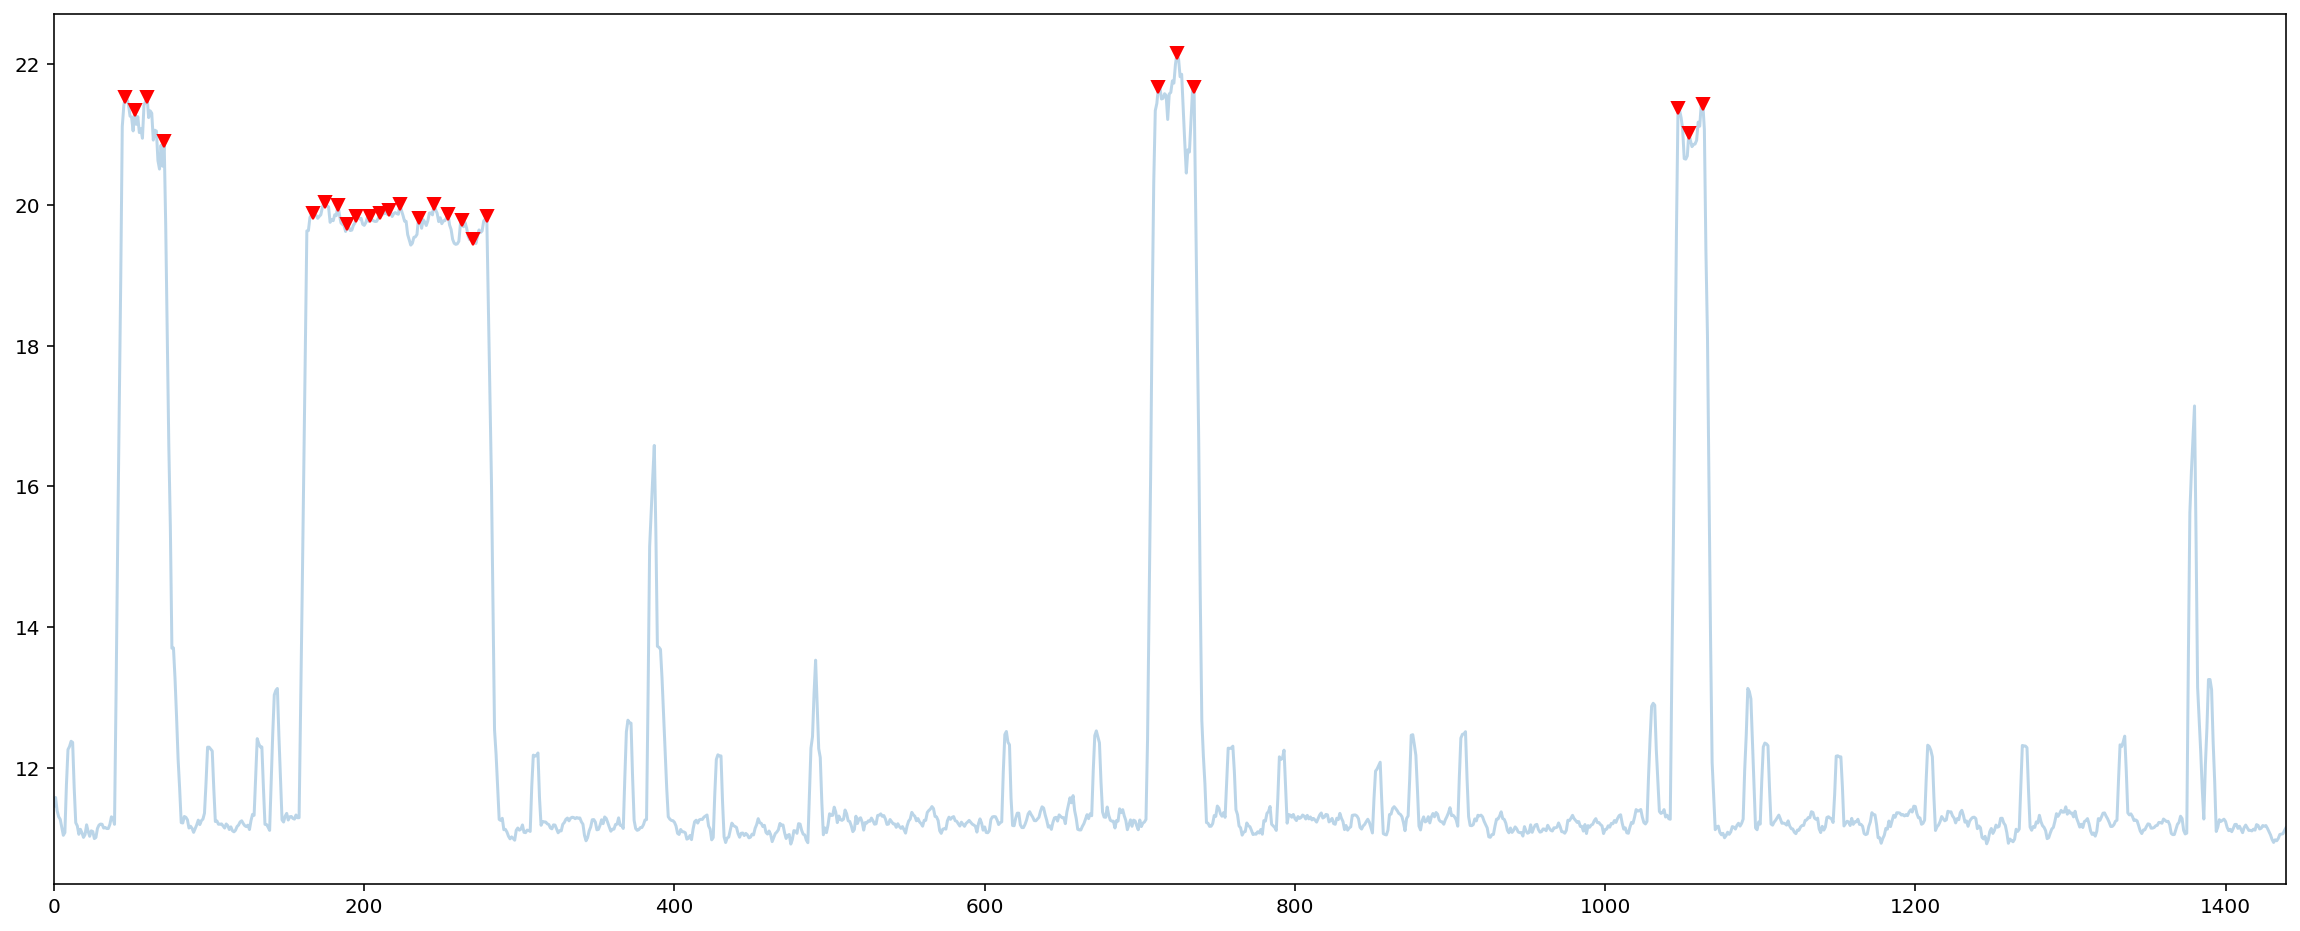

In [0]:
house1_rolling.TV.plot(figsize=(20,8), alpha=.3)
house1_rolling.iloc[peaks].TV.plot(style='.', lw=10, color='red', marker="v");

In [0]:
cb = np.array(house2_rolling['TV'])
peaks2 = peakutils.indexes(cb, thres=0.6, min_dist=5)

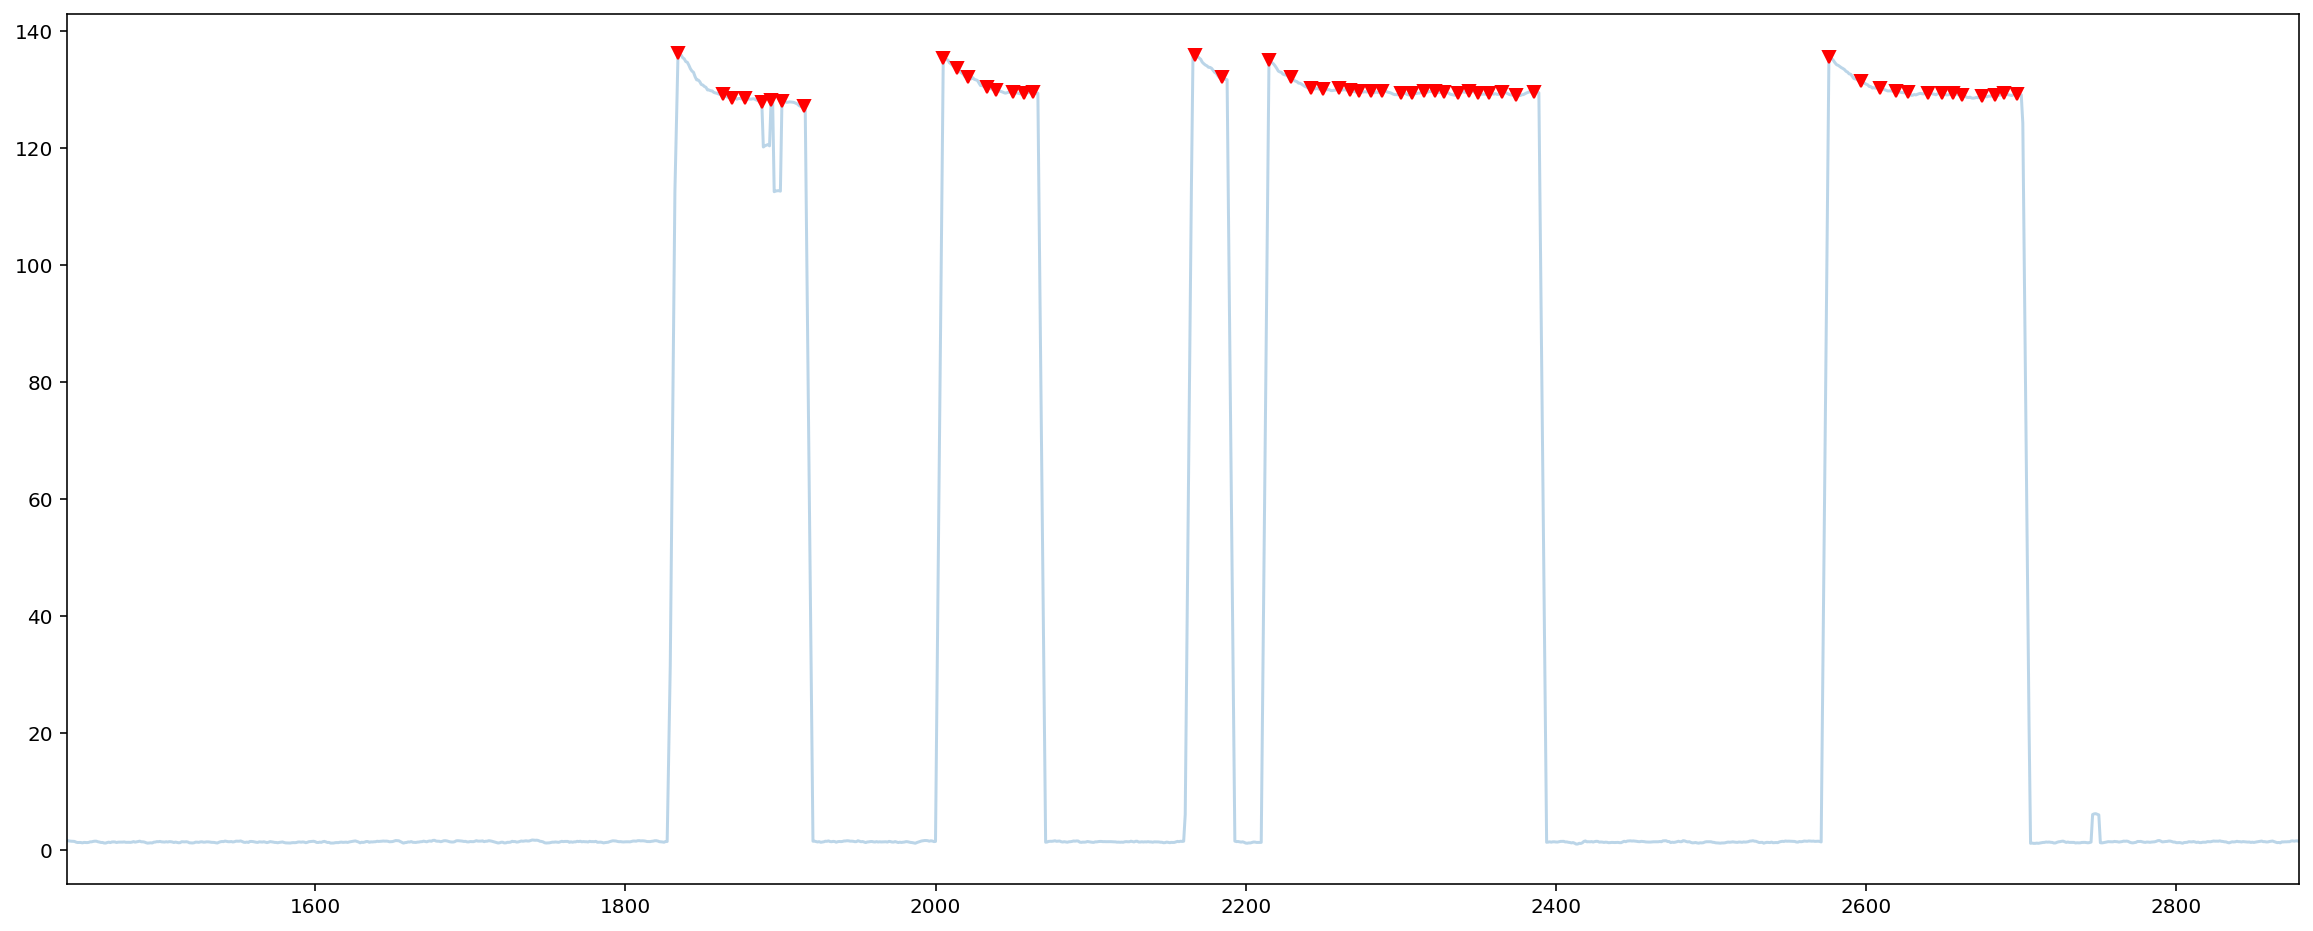

In [0]:
house2_rolling.TV.plot(figsize=(20,8), alpha=.3)
house2_rolling.iloc[peaks2].TV.plot(style='.', lw=10, color='red', marker="v");

In [0]:
cb = np.array(house3_rolling['TV'])
peaks3 = peakutils.indexes(cb, thres=0.72, min_dist=10) # tuning the threshold by eye to account for "standby mode"

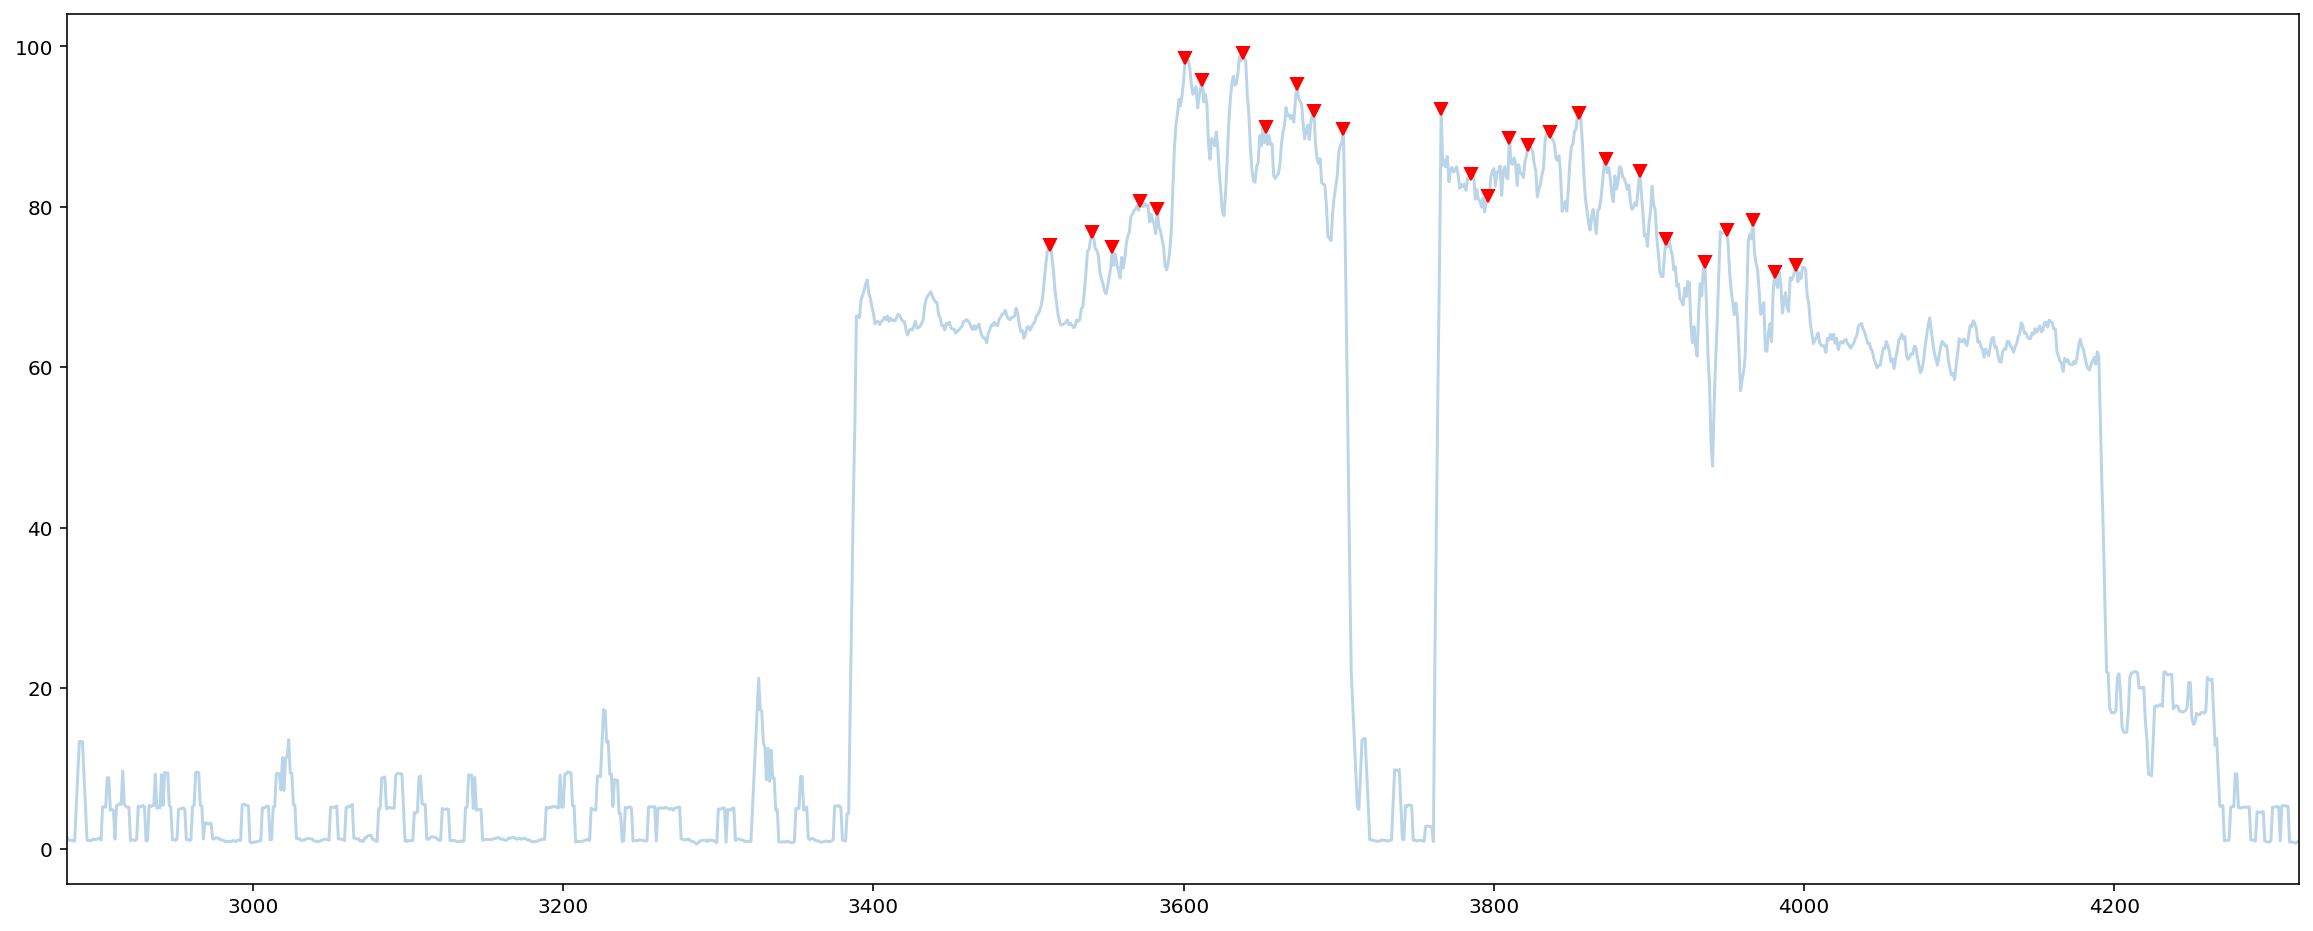

In [0]:
house3_rolling.TV.plot(figsize=(20,8), alpha=.3)
house3_rolling.iloc[peaks3].TV.plot(style='.', lw=10, color='red', marker="v");

In [0]:
peaks

array([  46,   52,   60,   71,  167,  175,  183,  189,  195,  204,  210,
        216,  223,  235,  245,  254,  263,  270,  279,  712,  724,  735,
       1047, 1054, 1063])

### Task 1 - Annotate indexes where the TV is defined as ON





In [0]:
# could do it manually but we want to define some rule to do it properly
# define a rule for a block of ON time

def starts_stops(peak_list):
  starts = []
  stops = []
  starts.append(peak_list[0])
  for i, x in enumerate(peak_list):
      # print(i, x)
      if x == peak_list[-1] and x - peak_list[i-1] <30:
          stops.append(peak_list[i])
          break
      if peak_list[i+1] - peak_list[i] > 30:
          stops.append(peak_list[i])
          starts.append(peak_list[i+1])
      if x == peak_list[-1]:
          stops.append(x)

  return starts, stops

starts, stops =  starts_stops(peaks)

In [0]:
# check the peak start and stop indexes have been found properly
print(starts)
print(stops)

[46, 167, 712, 1047]
[71, 279, 735, 1063]


In [0]:
# Make a dictionary of peak start [key] and peak end [value] pairs
peaks_dict = dict(zip(starts, stops))
peaks_dict

{46: 71, 167: 279, 712: 735, 1047: 1063}

In [0]:
# Make a list with the range of indexes containg a TV on peak
def list_idx_range(peak_dict):
  list_ON_idx = []
  for key in peak_dict:
    list_ON_idx.append(np.arange(key, peak_dict.get(key)+1, 1))

  return list_ON_idx

list_ON_idx = list_idx_range(peaks_dict)

In [0]:
# Make a 'TV_on' column and populate it with 0, which are changed to 1 at indexes in list_ON_idx

def TV_on_column(df, list_on):
  df['TV_on'] = 0 * len(house1)
  for i in list_on:
    df.at[i-5,'TV_on']=1 # i-5 to account for the rolling mean window = 5, time shift

  return df

house1 = TV_on_column(house1, list_ON_idx)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
# check we have 1s and 0s in the 'TV_on' column
house1.describe()

,House,Time,TV,Agg,TV_on
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.0,719.500000,12.688324,119.651557,0.125000
std,0.0,415.836506,3.259903,289.453657,0.330834
min,1.0,0.000000,10.533000,23.241000,0.000000
25%,1.0,359.750000,11.105000,25.746500,0.000000
50%,1.0,719.500000,11.279000,96.717500,0.000000
75%,1.0,1079.250000,11.558250,104.264000,0.000000
max,1.0,1439.000000,23.303000,2981.841000,1.000000


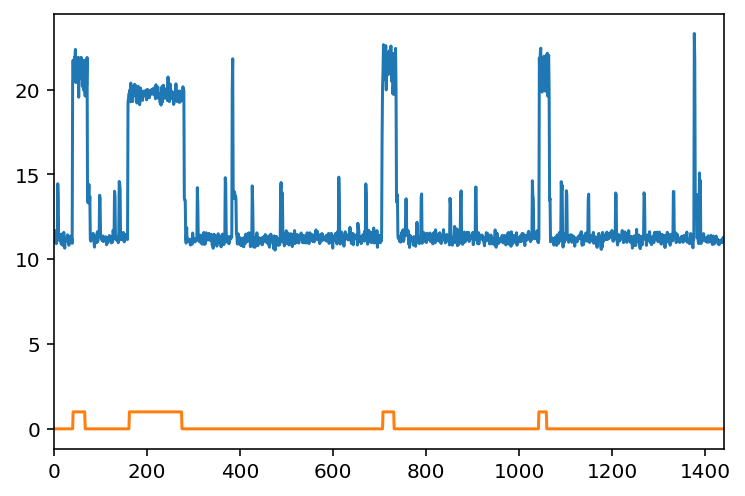

In [0]:
# plot the class labels and the TV time series to check it worked
house1['TV'].plot()
house1['TV_on'].plot()

In [0]:
# now do the same for the other houses and merge them into one dataframe for classifier training
peaks2 = [x+1440 for x in peaks2]
peaks3 = [x+2880 for x in peaks3]

starts2, stops2 = starts_stops(peaks2)
starts3, stops3 = starts_stops(peaks3)
peaks_dict2 = dict(zip(starts2, stops2))
peaks_dict3 = dict(zip(starts3, stops3))

In [0]:
peaks_dict2

{1834: 1915, 2005: 2063, 2167: 2386, 2576: 2697}

In [0]:
list_ON_idx2 = list_idx_range(peaks_dict2)
house2 = TV_on_column(house2, list_ON_idx2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
list_ON_idx3 = list_idx_range(peaks_dict3)
house3 = TV_on_column(house3, list_ON_idx3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



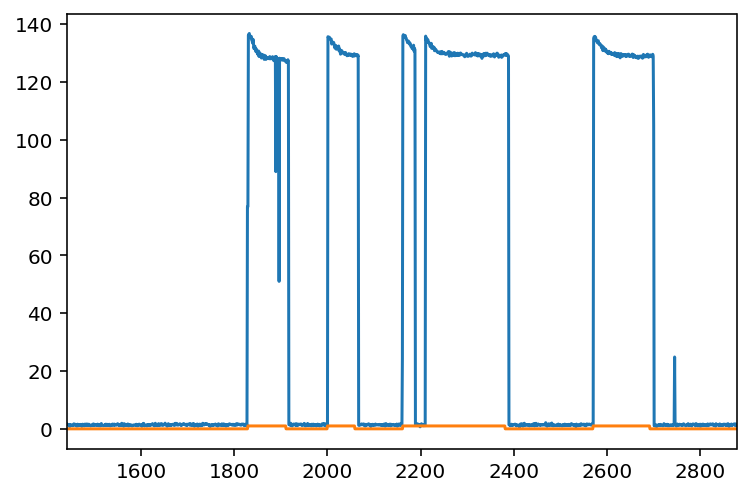

In [0]:
# plot the class labels and the TV time series to check it worked
house2['TV'].plot()
house2['TV_on'].plot()

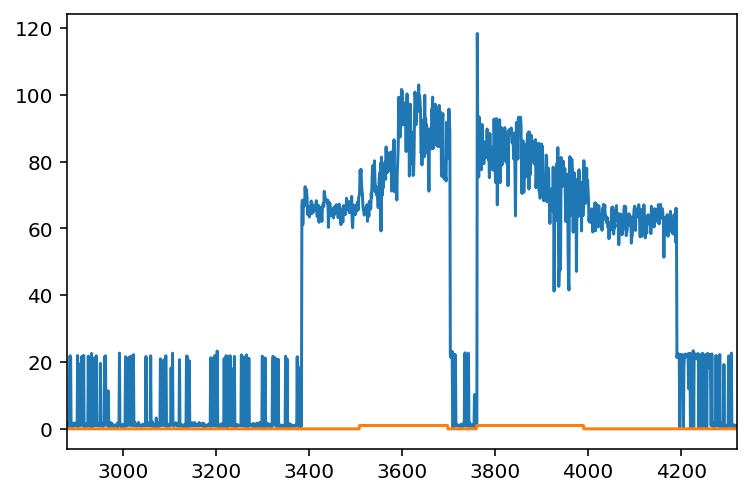

In [0]:
# plot the class labels and the TV time series to check it worked
house3['TV'].plot()
house3['TV_on'].plot()

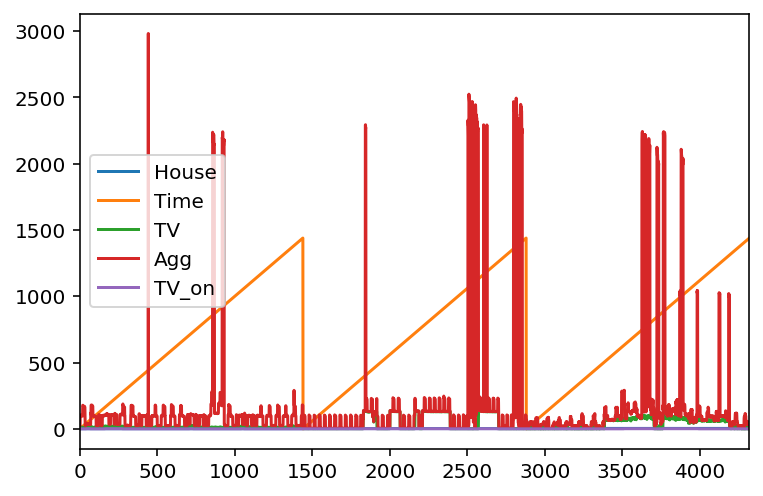

In [0]:
# Recombine the three house datasets into one dataframe and plot the data as a quick sanity check
%matplotlib inline
dataset = pd.concat([house1, house2, house3])
dataset.plot()

### Task2 - Training and Testing a TV on/off classifier





In [0]:
# Using the pairs of 'Agg' values and corresponding 'TV_on' labels we can train a simple
# classifier to learn the thresholds of values for 'Agg' corresponding to 'TV_on'

In [0]:
# Put our input 'Agg' and labels 'TV_on' into numpy arrays ready for sklearn
X = np.array(dataset['Agg'])
y = np.array(dataset['TV_on'])

In [0]:
print(X)
print(y)

[26.205 25.771 24.963 ... 33.613 34.107 30.956]
[0 0 0 ... 0 0 0]


In [0]:
X.shape

(4320,)

In [0]:
y.shape

(4320,)

In [0]:
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [0]:
X_train = X_train.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [0]:
X = X.reshape(-1, 1)
X.shape

(4320, 1)

In [0]:
# Train a random forest classifier and calculate the cross validation scores
clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y, cv=tscv)
print("Mean score per fold:", cv_score) # "score" for RF is mean accuracy by default
print("Mean CV score:", np.mean(cv_score)) 
print("CV score standard deviation:", np.std(cv_score))

Mean score per fold: [0.88472222 0.79722222 0.77083333 0.77361111 0.62916667]
Mean CV score: 0.7711111111111112
CV score standard deviation: 0.08215086994121709


In [0]:
# With GridSearch CV we can indentify the optimal hyperparameters from a input range
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }
grid_clf = GridSearchCV(clf, param_grid, cv=tscv)
grid_clf.fit(X, y)
# Printing out the best parameters from our param_grid...
print(grid_clf. best_params_)

{'max_depth': 2, 'n_estimators': 15}


In [0]:
# ..and the performance metrics for the GridSearch CV
print("Mean score per GridSearch CV fold:", grid_clf.cv_results_['mean_test_score'])
print("Mean CV score:", np.mean(grid_clf.cv_results_['mean_test_score']))
print("CV score standard deviation:", np.mean(grid_clf.cv_results_['std_test_score']))

Mean score per GridSearch CV fold: [0.83472222 0.83305556 0.83555556 0.83472222 0.79333333 0.78944444
 0.79361111 0.79416667 0.78361111 0.78666667 0.78527778 0.79083333
 0.77444444 0.77916667 0.77555556 0.77611111]
Mean CV score: 0.797517361111111
CV score standard deviation: 0.09658512734061192


* The GridSearch CV model squeezes out a small improvement in the mean CV score (model bias) at the slight expense of the standard deviation (model variance)

In [0]:
# this line returns the best random forest classifier parameters from GridSearch CV
grid_clf. best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

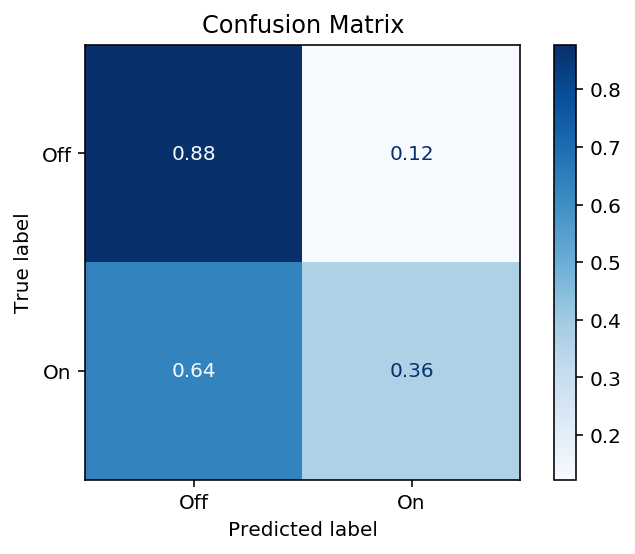

In [0]:
# Confusion Matrix
disp = plot_confusion_matrix(grid_clf, X_test, y_test,
                                 display_labels=['Off', 'On'],
                                 cmap=plt.cm.Blues, normalize='true'
                                 )
disp.ax_.set_title('Confusion Matrix')
plt.show()

* The confusion matrix above would argue that the random forest classifier is struggling most with false negatives, instances where the TV is ON but it predicts it to be OFF, which is to be expected given our inherent class imbalance in the dataset

In [0]:
# F1 score, Precision and Recall
print(classification_report(grid_clf.best_estimator_.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73       552
           1       0.36      0.71      0.48       168

    accuracy                           0.64       720
   macro avg       0.62      0.67      0.61       720
weighted avg       0.76      0.64      0.67       720



* The precision scores (P = TP/TP+FP) in the table above indicate the far greater precision on the TV off class but with a more similar recall (R = TP/TP+FN) for both on and off. So though the classifier is significantly better at nowing when the TV is off, it is able to recall the majority of instances of both class. 
* The F1 score (F1 = 2*(P*R)/P+R) quanitifies the balance between the precision and recall of the model for different classes and summarises once again that the model does better at predicting the off class than the on class
* The support column gives the number of true examples of a class in the dataset and again highlights the class imbalance

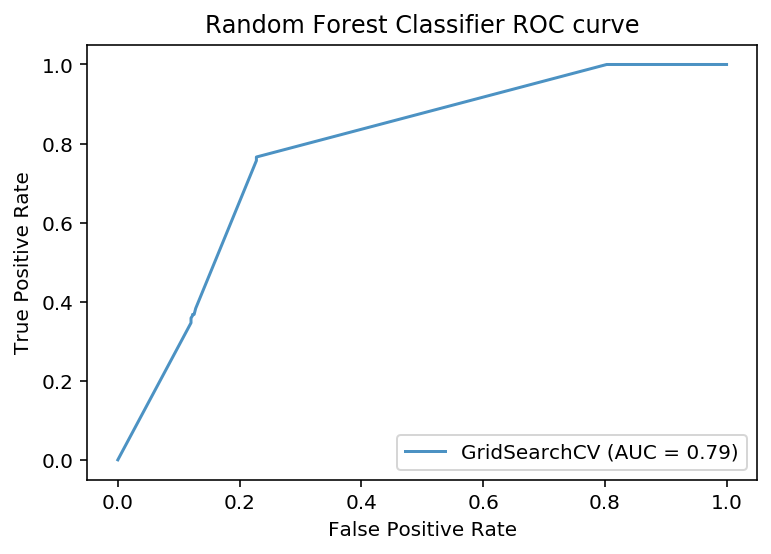

In [0]:
# ROC curve
ax = plt.gca()
rfc_disp = plot_roc_curve(grid_clf, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Random Forest Classifier ROC curve')
plt.show()

* With an area under the curve (AUC) on the receiver operator characteristic (ROC) curve of 0.78, it looks like the random forest classifier has learned something about the relationship between 'Agg' and 'TV_on' but there is certainly room for improvement.
* Improvement could be achieved in several ways. For example:
 - Go over the data filtering and peak labelling to improve the quality of the TV on off class assignment
 - Collecting more data and balance the TV on and off classes
 - Using a different type of model, perhaps a gradient boost tree algorithm like XGBoost or feed forward neural network, with the same input used above
 - Using a sliding window to extract slices of the 'Agg' time series and corresponding 'TV_on' labels and use this as input for a recurrent neural network architecture, such as an LSTM

## Question 4


You are given a dataset that contains occurences of the Kettle in a
single-occupancy house for the duration of a month. In this dataset, ‘ts’
column indicates the unix-timestamp (this can be converted to date and
time) that the kettle was turned ON; and the ‘second’ column indicates the
duration in seconds that the kettle was ON.

* Task 1: Find routines in the data, evaluate their periodicities and
variabilities. For instance, a routine could be “breakfast”, its periodicity
might be every day at a certain time and variability might be a time window
within the routine occurred.
* Task 2: Detect anomalies whenever there is a deviation from the routines.


Please provide a script which attempts task 1 and 2. Please do not
provide a script without explanations.
-------------------- End of paperwork --------------------

In [0]:
Q4_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Q4-data.csv")

In [0]:
Q4_data.head()

,Unnamed: 0,ts,seconds
0,0,1551685815,275
1,1,1551686207,14
2,2,1551686461,21
3,3,1551697913,170
4,4,1551698199,12


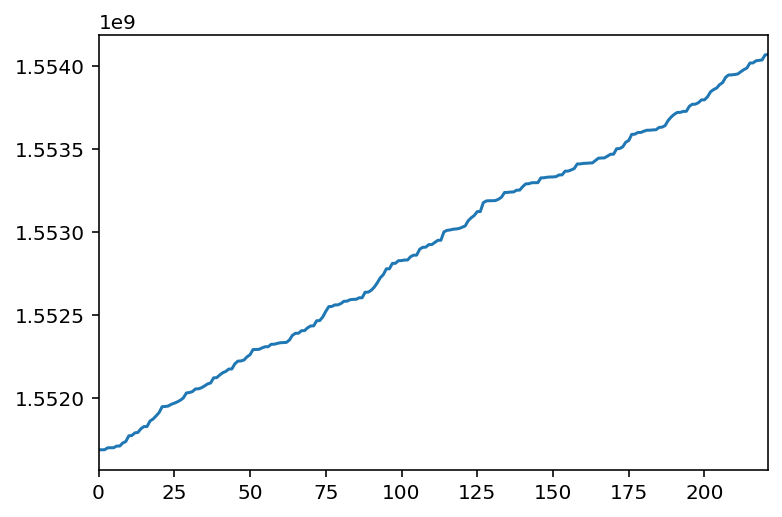

In [0]:
Q4_data.ts.plot()

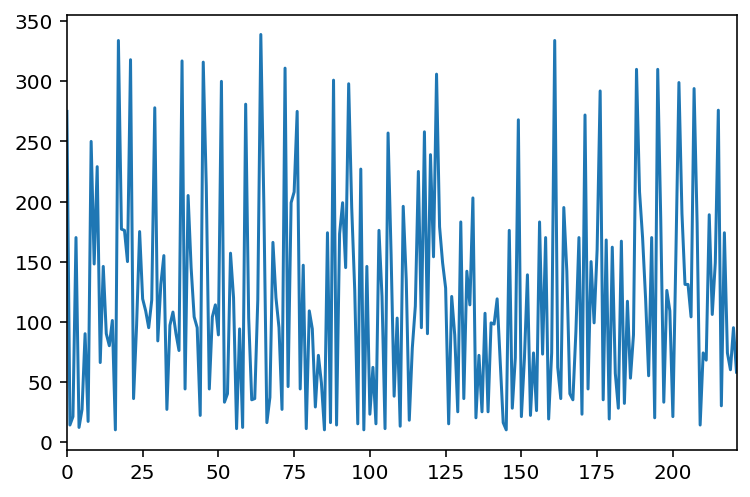

In [0]:
Q4_data.seconds.plot()

### Task 1 - Find kettle routines



In [0]:
from datetime import datetime, timedelta

In [0]:
start = datetime(1970, 1, 1)  # Unix epoch start time
Q4_data['datetime'] = Q4_data.ts.apply(lambda x: start + timedelta(seconds=x))

In [0]:
Q4_data.head()

,Unnamed: 0,ts,seconds,datetime
0,0,1551685815,275,2019-03-04 07:50:15
1,1,1551686207,14,2019-03-04 07:56:47
2,2,1551686461,21,2019-03-04 08:01:01
3,3,1551697913,170,2019-03-04 11:11:53
4,4,1551698199,12,2019-03-04 11:16:39


In [0]:
# # Apply a rolling mean to the time series to smooth it slightly and make daily/weekly trends clearer
Q4_data_rolling = pd.DataFrame()
Q4_data_rolling['seconds'] = Q4_data.seconds.rolling(window= 5).mean()
Q4_data_rolling['datetime'] = Q4_data['datetime']

In [0]:
# Use the altair library to make an interactive chart of the time series with days of the week shown
alt.Chart(Q4_data).mark_line(size=2, opacity=0.7, color = 'Blue').encode(
        x='datetime:T',
        y=alt.Y('seconds', title='seconds'),    
        tooltip=['datetime', 'seconds']
    ).interactive().properties(
        title='Kettle Time Series', width=870, height=450
    ).configure_title(fontSize=20)

    # .transform_window(rolling_mean='mean(seconds)',frame=[-15, 15])

alt.Chart(...)

- Based on inspection of plot above, there seems to be a definite tendency for the highest amplitude peaks to occur in the morning hours. 
- The wider peak widths (larger AUC) likely correspond to night time hours when the occupant is not awake making tea


In [0]:
# Find the peaks in the time series to allow clustering of peaks of different amplitude (kettle duration)
cb = np.array(Q4_data['seconds'])
peaks_Q4 = peakutils.indexes(cb, thres=0.1, min_dist=1)

In [0]:
peaks_Q4

array([  3,   6,   8,  10,  12,  15,  17,  21,  24,  29,  32,  35,  38,
        40,  45,  49,  51,  54,  57,  59,  64,  68,  72,  76,  78,  80,
        83,  86,  88,  91,  93,  97,  99, 101, 103, 106, 109, 111, 116,
       118, 120, 122, 127, 130, 132, 134, 136, 138, 140, 142, 146, 149,
       152, 154, 156, 158, 161, 164, 169, 171, 173, 176, 178, 180, 183,
       185, 188, 193, 195, 198, 202, 207, 210, 212, 215, 217, 220])

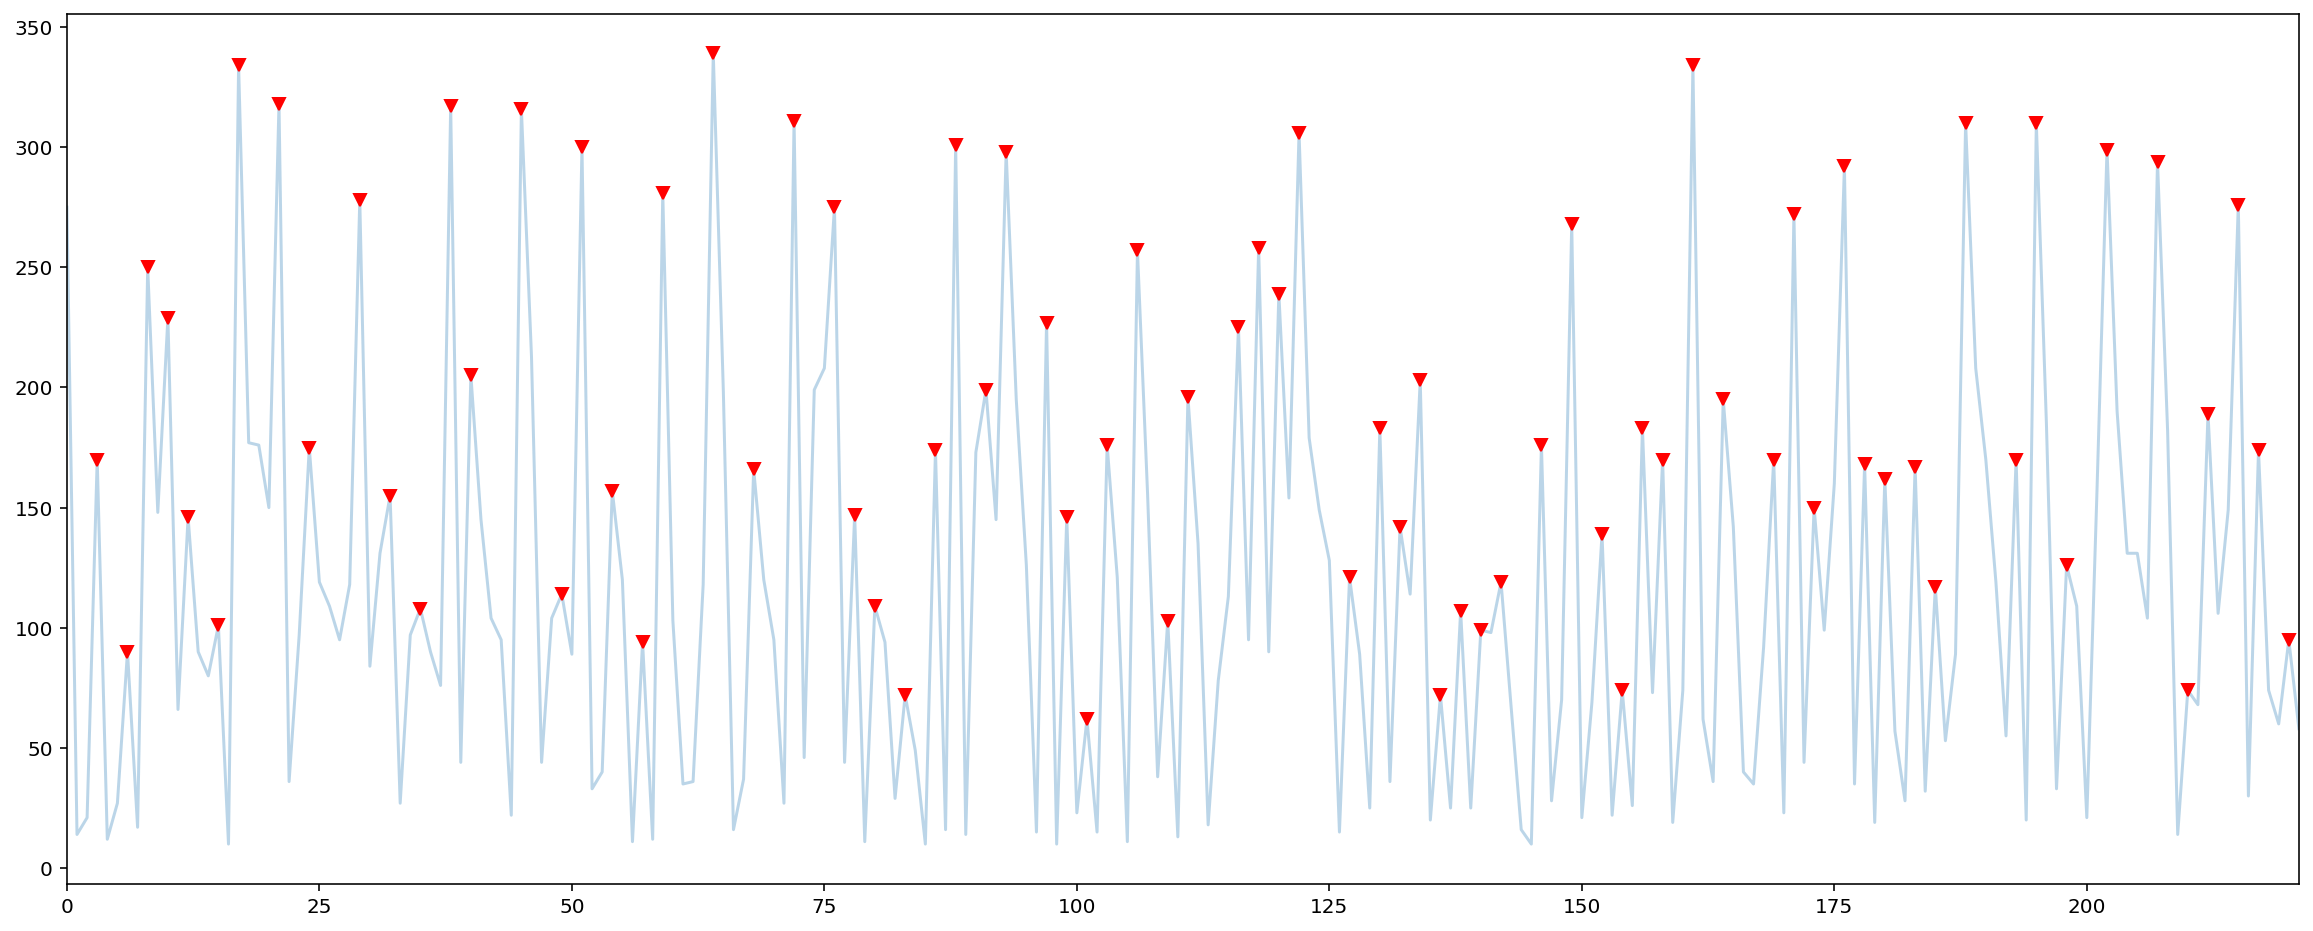

In [0]:
Q4_data['seconds'].plot(figsize=(20,8), alpha=.3)
Q4_data['seconds'].iloc[peaks_Q4].plot(style='.', lw=10, color='red', marker="v");

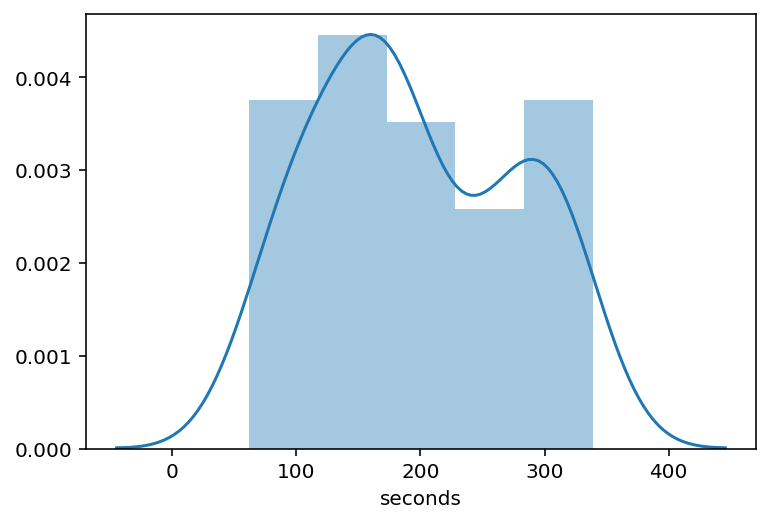

In [0]:
# Checking the distribution of the Kettle events 'seconds' 
sns.distplot(Q4_data['seconds'].iloc[peaks_Q4])

Inspection of the above histogram indicates two distinct routines in the time series:



In [0]:
# If I plot peak amp. vs time of day vs day of week, I may be able to cluster the data
Q4_data['Dates'] = pd.to_datetime(Q4_data['datetime']).dt.date
Q4_data['Time'] = pd.to_datetime(Q4_data['datetime']).dt.time
Q4_data['day_of_week'] = Q4_data.datetime.dt.day_name()

In [0]:
# Get the day and time columns into a plottable format
df_new = pd.DataFrame()
df_new['peaks'] = Q4_data['seconds'].iloc[peaks_Q4]
df_new['day'] = Q4_data['day_of_week'].iloc[peaks_Q4]
df_new['time'] = Q4_data['Time'].iloc[peaks_Q4]
df_new = df_new.replace({'day':{'Monday': 0, 'Tuesday': 1, 'Friday': 4, 'Wednesday': 2, 'Thursday': 3, 'Sunday': 6, 'Saturday': 5}})
df_new['hours'] = Q4_data.datetime.dt.hour
df_new.head()

,peaks,day,time,hours
3,170,0,11:11:53,11
6,90,0,14:08:15,14
8,250,0,19:19:52,19
10,229,1,07:18:24,7
12,146,1,12:14:04,12


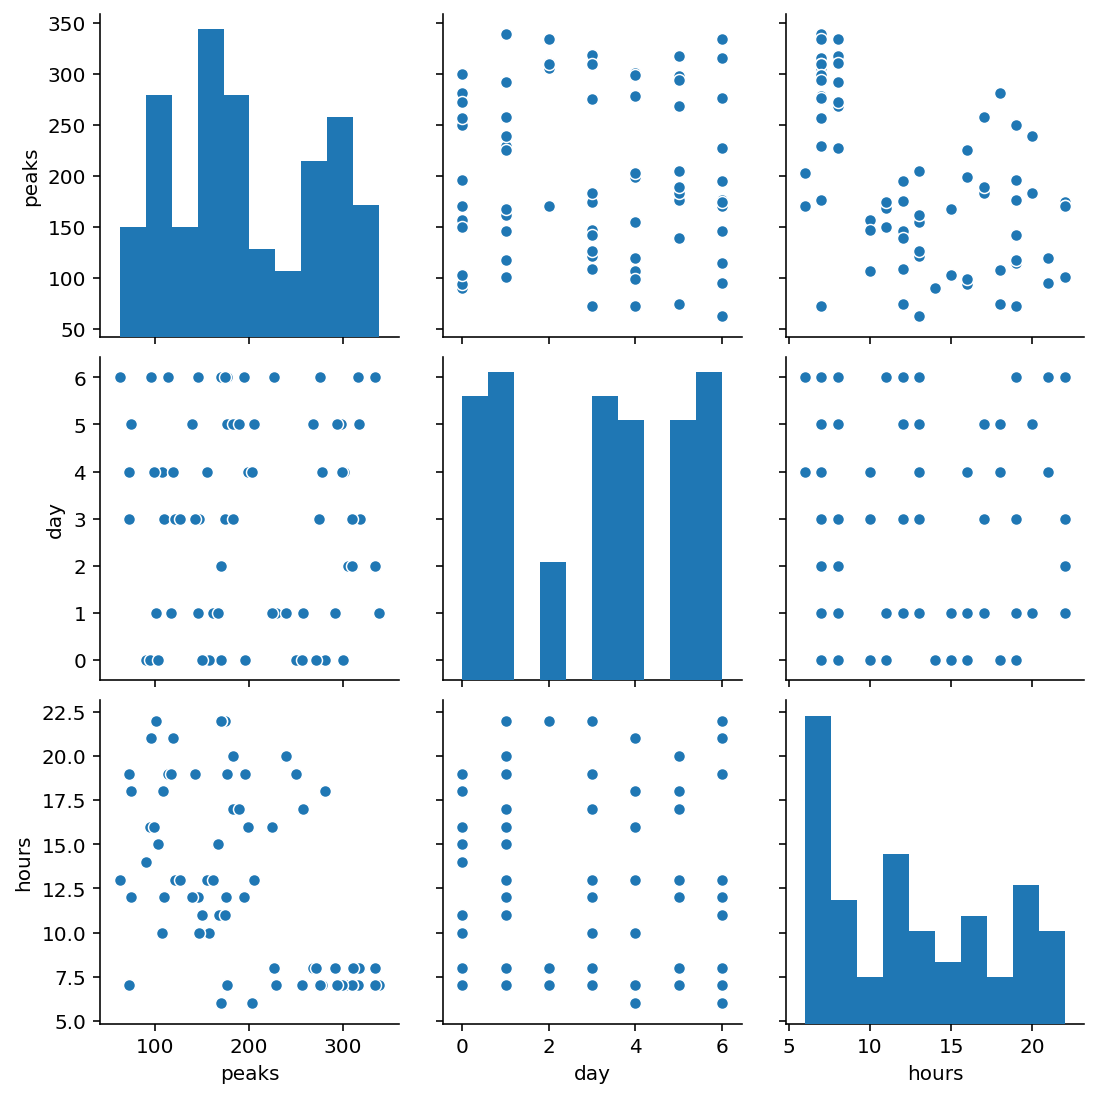

In [0]:
# Make a pairplot to visualise the relationship between the features
sns.pairplot(df_new);

The kettle-on time is longer between approx. 6-8am than for the rest of the day, the kettle is on less often on Wednesdays when its only on in the mornings and evenings.
My thoughts about this household:
- In the morning the amplitude of the peaks are higher, suggesting a large volume of water is boiled in the kettle, therefore more people are likely to be at home. 
- During the remainder of the day the kettle peak amplitude is lower suggetsing a lower volume of water is boiled, and as such less people are likely to be at home. 
- On Wednesdays there are only two clusters in the morning and evening, suggesting no one is in during the day.
- The kettle is not on between 23hours and 5 am (i.e the middle of the night)




In [0]:
# now inspect the two clusters
morning = df_new.loc[(df_new.hours <= 9.5)]
other_times = df_new.loc[(df_new.hours >= 9.5)]
morning.describe()

,peaks,day,hours
count,28.000000,28.000000,28.000000
mean,274.357143,3.392857,7.214286
std,59.670214,2.006273,0.568112
min,72.000000,0.000000,6.000000
25%,265.250000,2.000000,7.000000
50%,296.000000,4.000000,7.000000
75%,310.250000,5.000000,8.000000
max,339.000000,6.000000,8.000000


In [0]:
other_times.describe()

,peaks,day,hours
count,49.000000,49.000000,49.000000
mean,151.877551,2.877551,15.653061
std,50.588056,2.156701,3.761377
min,62.000000,0.000000,10.000000
25%,109.000000,1.000000,12.000000
50%,155.000000,3.000000,16.000000
75%,176.000000,5.000000,19.000000
max,281.000000,6.000000,22.000000


- Looking at the summary statistics for the "morning" and the "other" clusters, we see they have different mean peak amplitudes (274 vs 151) and days of the week.




In [0]:
df_new['morning'] = np.where(df_new['hours']<= 9.5, 'Morning', 'Other')

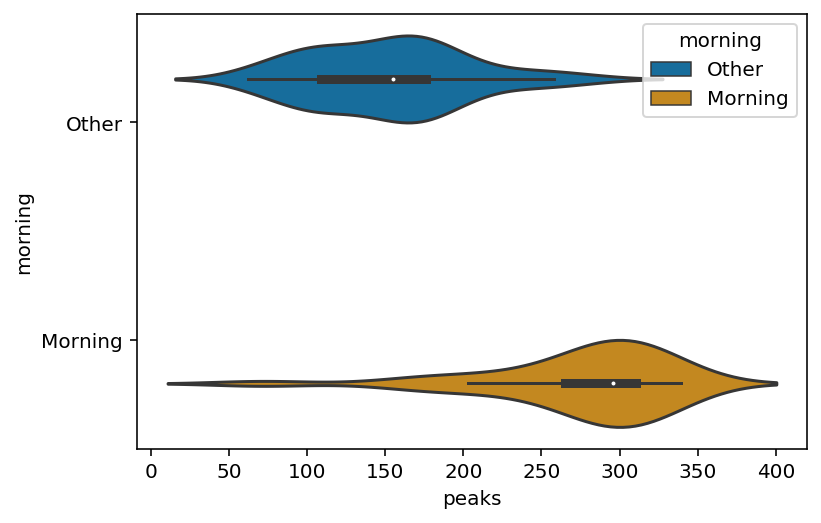

In [0]:
ax = sns.violinplot(x='peaks', y="morning", hue="morning", data=df_new, palette="colorblind")

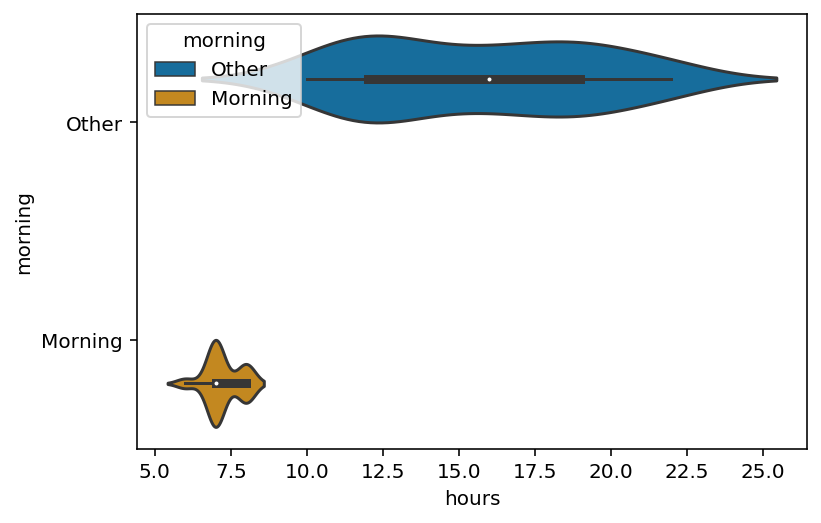

In [0]:
ax = sns.violinplot(x='hours', y="morning", hue="morning", data=df_new, palette="colorblind")

The violin plots above, reiterate points from the summary statistics tables:
- that the morning cluster has a higher mean peak amplitude than the "other" cluster
- that the morning cluster is more tightly distributed than the "other" cluster




### Task2 - Anomaly detection



https://towardsdatascience.com/anomaly-detection-time-series-4c661f6f165f

The example at the link above demonstrates how to fit a seasonal model to a time series dataset and use this to define confidence intervals for anomaly detection, using the facebook prophet library to fit the model and the altair interactive plotting library to visualise the dataset, confidence intervals and anomaly detection. I've followed this guide with the data provided below, to implement an anomaly detection system:

In [0]:
# fitting a seasonal model to the time series. Setting daily and weekly seasonaility to True
# also tuning "interval_width" the uncertainty interval and removing "changepoint_range" parameter 
# for sudden trend changes, as we want prophet to estimate those
def fit_predict_model(dataframe, interval_width = 0.9):
    m = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = True,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width) #,changepoint_range = changepoint_range
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

In [0]:
# generate the model
Q4_data['y'] = Q4_data['seconds']
Q4_data['ds'] = Q4_data['datetime']
pred = fit_predict_model(Q4_data)

In [0]:
# setting up confidence interval thresholds for anomaly detection 
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

In [0]:
# apply the anomaly detection thresholding to the dataset
pred = detect_anomalies(pred)

In [0]:
# plotting the data, the confidence intervals and the anomalies lying outside them in an interactive plot
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Kettle'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Kettle'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)

In [0]:
plot_anomalies(pred)

alt.LayerChart(...)

- The anomaly detection system above defines data points above or below the model confidence interval threshold as outliers
- The larger the circle the more significant the outlier and the larger circles are all below the lower bounds of the model, at times where more Kettle usage is expected
- The system could be continuously updated with new data, allowing it redefine the confidence interval of normal routine as new time series data is fed in